# I: Leave-One-Out Cross Validation:

Implement a **Leave-One-Out cross-validation (CV)** function for your **KNN regressor**:

cv(train.data, train.label, K, numFold=?) 

which takes the training data and their labels (continuous values), K value, the number of folds, and returns errors for different folds of the training data.

In [1]:
## Loading the necessary libraries:

library(reshape2)
library(ggplot2)
library(corrplot)
library("Cairo")

corrplot 0.84 loaded



In [2]:
## Reading the training and testing files in R:

train_data <- read.csv("Task1A_train.csv")
test_data <- read.csv("Task1A_test.csv")

In [3]:
dim(train_data)
dim(test_data)

[1] 42  2

[1] 42  2

## Training and Testing sets:

In [4]:
# create  training and testing subsets:

train.data <- train_data[ 1] 
train.label <- train_data[-1]
test.data <- test_data[1] 
test.label <- test_data[-1]

In [5]:
nrow(test.data)

[1] 42

In [6]:
test1.len <- nrow(test.data)
test1.len

[1] 42

In [7]:
## KNN Regressor:

knn <- function(train.data, train.label, test.data, K=3, distance = 'manhattan'){
    
    ## Count number of train samples:
    train.len <- NROW(train.data)                               ## R considers dataframe as a list
    
    ## Count number of test samples:
    
    test.len <- NROW(test.data)
    #print(test.len)
    
    train.data <- data.frame(train.data)
    test.data <- data.frame(test.data)
    train.label <- data.frame(train.label)
    test.label <- data.frame(test.label)
    names(train.data) <- names(test.data)
    
    ## Calculate distances between samples:
    
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len),drop=FALSE]
    #print(dist)

    
    ## For each test sample:
    
    for (i in 1:test.len){
        
        ## Find its K nearest neighbours from training samples:
        
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        #print(nn)

        #print(train.label)
        
        ## Calculate the predicted labels according to the mean of the nearest neighbours:
        regr<- mean(train.label[nn,])
    }
    
    ## Return the predictions as output:
    
    return (regr)
}

## Implementing LOOCV:

Leave-one-out cross-validation (LOOCV) is a particular case of leave-p-out cross-validation with p = 1.The process looks similar to jackknife; however, with cross-validation one computes a statistic on the left-out sample, while with jackknifing one computes a statistic from the kept samples only.

In [8]:
## Defining a function to carry out LOOCV:

cv <- function(train.data, train.label, K, numFold=4){
    residuals <- as.data.frame(train.label)
    
    for (i in 1:numFold){
        
        
        test_row <- train.data[i,]                                    ## Selecting the testing row from the training data
        test_label <- train.label[i,]                                 ## Selecting the same testing label
        
        
        train_rows <- train.data[-i,]                                 ## Selecting all rows except the testing row
        train_labels <- train.label[-i,]                              ## Selecting all labels except the testing label
        

        predictions <- knn(train_rows, train_labels, test_row,K)      ## Applying KNN to get prediction for the testing row
        residuals[i,] <- abs(test_label - predictions)                ## Calculating errors or residuals between actual and predicted values
        
    }
    
    ## Return the predictions:
    
    return(residuals)
}

In [9]:
errors <- as.data.frame(train.data)
for (i in 1:4){
    print(i)
    test_row <- train.data[i,]
    test_label <- train.label[i,]
    #print(test_row)
    #print(test_label)
    train_rows <- train.data[-i,]
    train_labels <- train.label[-i,]
    #print(train_rows)
    print(train_labels)
    pred_row <- knn(train_rows, train_labels, test_row,3)
    print(pred_row)
    #break
}  

[1] 1
 [1]  0.85  0.61  0.92  0.72  0.92  0.83  1.00  0.92  1.24  1.16  1.45  1.26
[13]  1.86  1.53  1.83  1.53  2.34  2.16  2.70  2.79  3.69  3.60  4.32  4.86
[25]  5.04  5.58  6.57  6.03  6.93  6.93  7.83  7.74  8.28  9.54  9.54 11.88
[37] 12.15 14.04 14.85 16.20 16.02
[1] 0.7933333
[1] 2
 [1]  0.71  0.61  0.92  0.72  0.92  0.83  1.00  0.92  1.24  1.16  1.45  1.26
[13]  1.86  1.53  1.83  1.53  2.34  2.16  2.70  2.79  3.69  3.60  4.32  4.86
[25]  5.04  5.58  6.57  6.03  6.93  6.93  7.83  7.74  8.28  9.54  9.54 11.88
[37] 12.15 14.04 14.85 16.20 16.02
[1] 0.7466667
[1] 3
 [1]  0.71  0.85  0.92  0.72  0.92  0.83  1.00  0.92  1.24  1.16  1.45  1.26
[13]  1.86  1.53  1.83  1.53  2.34  2.16  2.70  2.79  3.69  3.60  4.32  4.86
[25]  5.04  5.58  6.57  6.03  6.93  6.93  7.83  7.74  8.28  9.54  9.54 11.88
[37] 12.15 14.04 14.85 16.20 16.02
[1] 0.8266667
[1] 4
 [1]  0.71  0.85  0.61  0.72  0.92  0.83  1.00  0.92  1.24  1.16  1.45  1.26
[13]  1.86  1.53  1.83  1.53  2.34  2.16  2.70  2.79  3.69 

In [10]:
## Returning the 42 errors by cv function:

cv(train.data, train.label, 4, 42)

y
<dbl>
0.0650
0.1100
0.1900
0.1450
0.1000
0.0525
0.0600
0.0225
0.1375


# II:

In [11]:
## Calculate the training set missclassification rates for K in 1:15:

miss <- data.frame('K'=1:15, 'train'=rep(1,15))
for (k in 1:15){
    train_y_pred <- cv(train.data, train.label, k, NROW(train.data))        ## Number of folds is the number of datapoints in the training set
    
    ## Calculating average of the errors returned by the cv function:

    mean_train <- mean(train_y_pred$y, na.rm=TRUE)
    
    ## Storing the mean of errors for each K:

    miss[k,'train'] <- (mean_train)
}

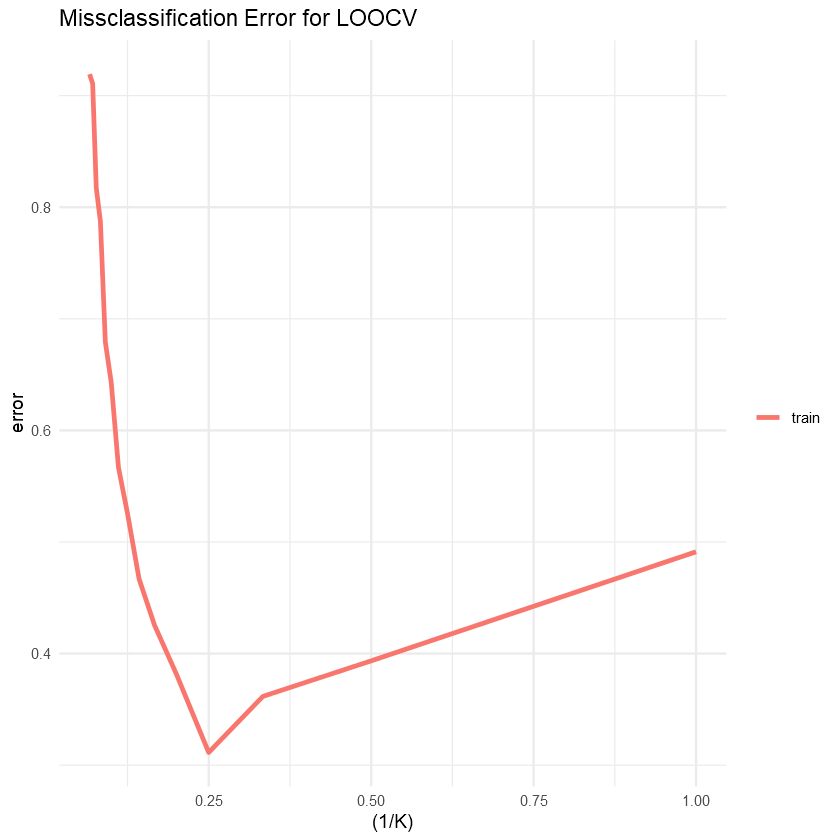

In [12]:
## Plot misclassification percentage for training dataset:

miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=(1/K), y=error, color=type)) + geom_line(size=1) +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error for LOOCV")

# III:
## Observation:

- It is evident from the graph above that the error is minimum when **1/K = 0.25**.
- This means at **K = 4**, the error is going to be the least and hence the **optimum value** for **K is 4**.